   1 - age (numeric)

   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

   5 - default: has credit in default? (categorical: "no","yes","unknown")

   6 - housing: has housing loan? (categorical: "no","yes","unknown")

   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   # related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone")

   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   # other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

  14 - previous: number of contacts performed before this campaign and for this client (numeric)

  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   # social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

  17 - cons.price.idx: consumer price index - monthly indicator (numeric)

  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  
  20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

###Upload Required Libraries and import the dataset

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from datetime import datetime
from matplotlib import pyplot as plt
import os
import matplotlib.style
plt.style.use('classic')
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df =pd.read_csv("/content/drive/MyDrive/Kaggle/bank-additional-full.csv" , sep=';')

###Information about the Data

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [8]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  41188 
no. of columns:  21


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
df.isnull().sum().sort_values(ascending=False)

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


###Treating Duplicates

In [12]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 12


In [13]:
df.drop_duplicates(inplace=True)

In [14]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


Since we aim to predict whether or not a client, targeted by the campaign, subscribes to a term deposit (y) after a phone call, we can exclude the 'duration' of the call from the model, as it occurs after the target event.

###Checking each variable and treating them

In [15]:
df.drop('duration', axis=1, inplace=True)

In [16]:
for i in df:
    print(f'column {i}: {df[i].unique()}')

column age: [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
column job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
column marital: ['married' 'single' 'divorced' 'unknown']
column education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
column default: ['no' 'unknown' 'yes']
column housing: ['no' 'yes' 'unknown']
column loan: ['no' 'yes' 'unknown']
column contact: ['telephone' 'cellular']
column month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
column day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
column campaign: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 2

###Univariate Analysis

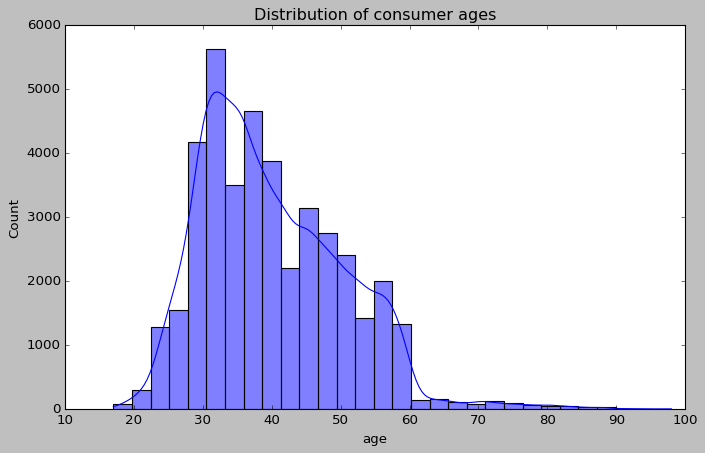

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df["age"], bins=30, kde=True)
plt.title("Distribution of consumer ages")
plt.show()

The majority of consumers are between 30 and 40 years.

Few of them are above 90 years old.

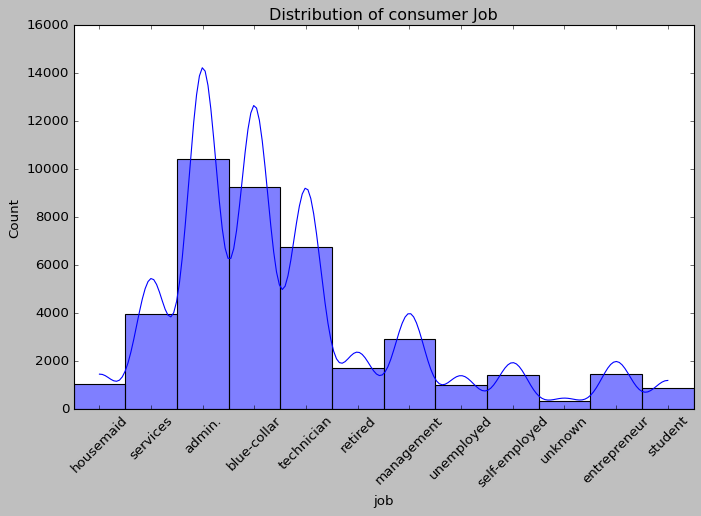

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df["job"], bins=30, kde=True)
plt.title("Distribution of consumer Job")
plt.xticks(rotation=45)
plt.show()

Admin , Blue-collar and Technicians dominate the occupation field.

Very few consumers are students and housemaid.

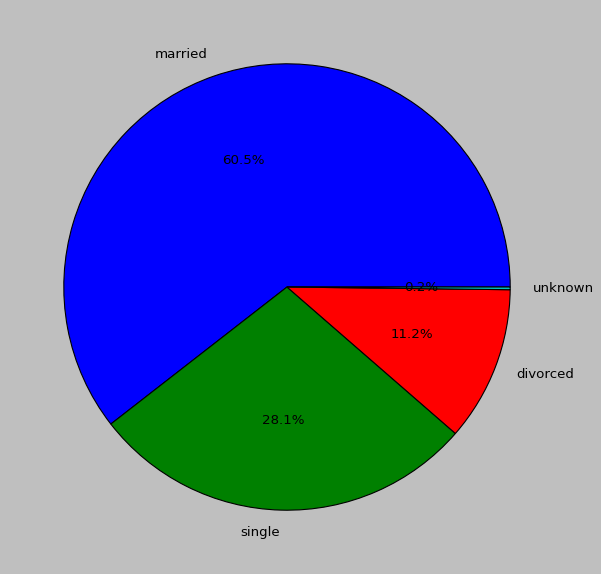

In [19]:
plt.figure(figsize=(9,9))
plt.pie(df["marital"].value_counts(),labels=df["marital"].value_counts().index,autopct='%1.1f%%')
plt.show()

60.5% of the consumers are married

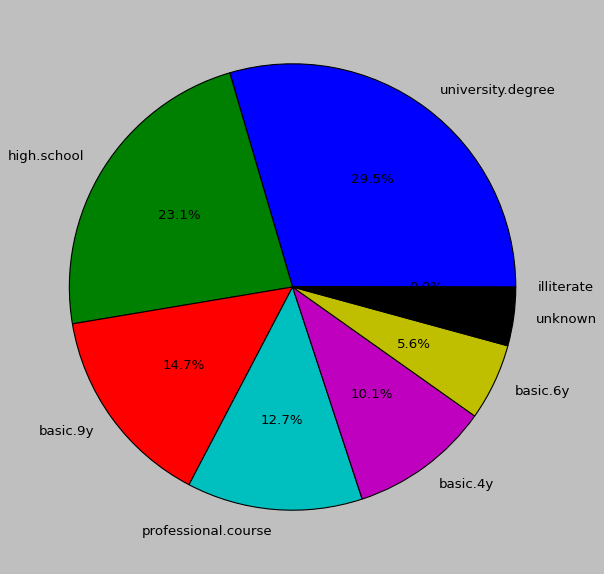

In [20]:
plt.figure(figsize=(9,9))
plt.pie(df["education"].value_counts(),labels=df["education"].value_counts().index,autopct='%1.1f%%')
plt.show()

Majority of the consumers do not hold university degree or professional course.

Education levels are basic mostly

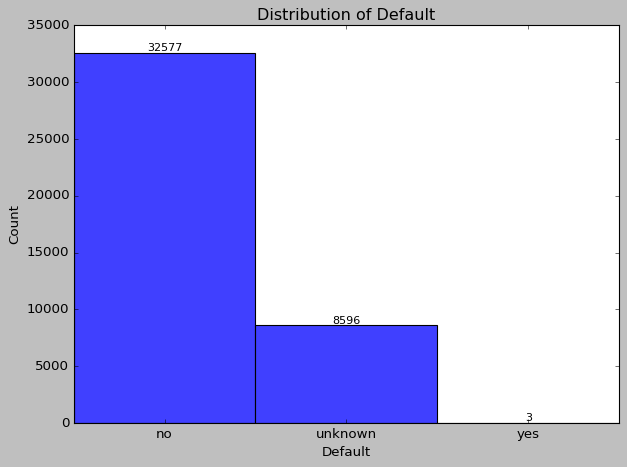

In [21]:
# Use histplot with discrete=True for categorical data
ax = sns.histplot(df['default'], bins=3, discrete=True)

# Add count labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.title('Distribution of Default')
plt.xlabel('Default')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

We find only 3 defaulters in the Dataset however there are 8596 records unknown which can be defaulters or no.

Non defaulters are much higher in number which is a good thing

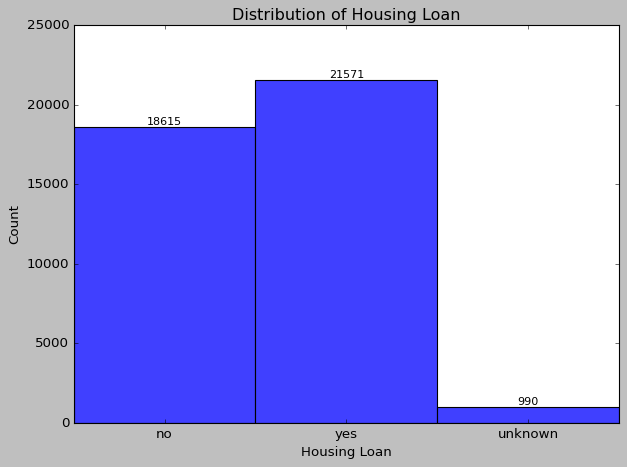

In [22]:
# Use histplot with discrete=True for categorical data
bx = sns.histplot(df['housing'], bins=3, discrete=True)

# Add count labels on top of each bar
for p in bx.patches:
    height = p.get_height()
    bx.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.title('Distribution of Housing Loan')
plt.xlabel('Housing Loan')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

21571 consumers have housing loan which is more than 50%

990 consumers fall under unknown category.

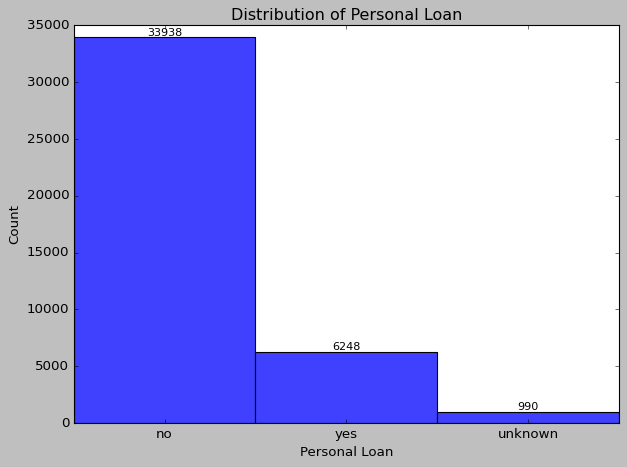

In [23]:
# Use histplot with discrete=True for categorical data
cx = sns.histplot(df['loan'], bins=3, discrete=True)

# Add count labels on top of each bar
for p in cx.patches:
    height = p.get_height()
    cx.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.title('Distribution of Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Only 6248 consumers have Personal Loan.

990 consumers are unknown.

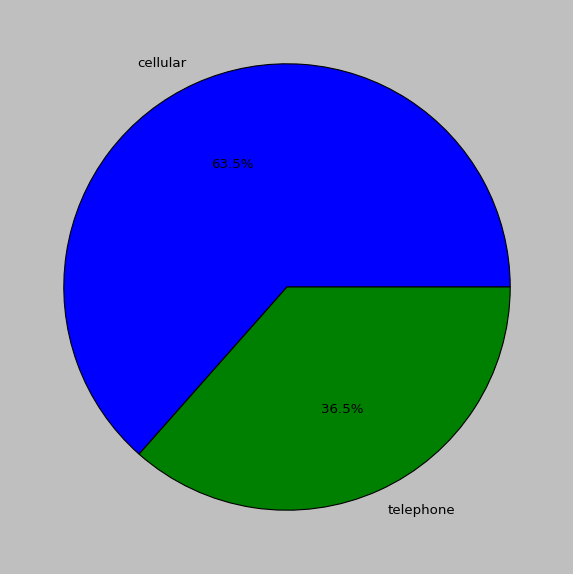

In [24]:
plt.figure(figsize=(9,9))
plt.pie(df["contact"].value_counts(),labels=df["contact"].value_counts().index,autopct='%1.1f%%')
plt.show()

63.5% of the consumers prefer cellular over telephone as a communication device.

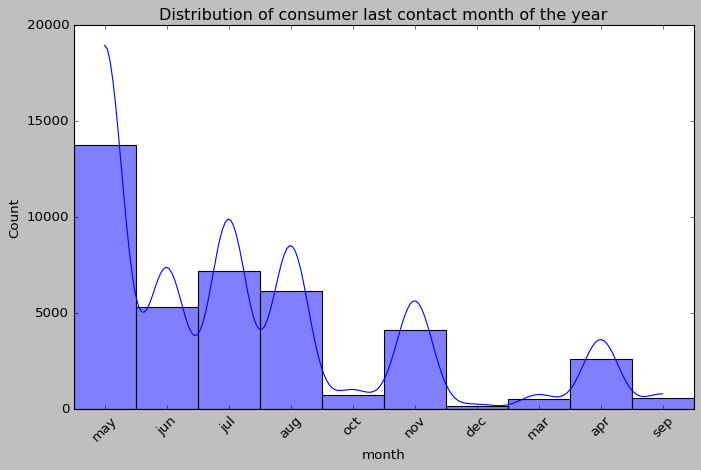

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df["month"], bins=30, kde=True)
plt.title("Distribution of consumer last contact month of the year")
plt.xticks(rotation=45)
plt.show()

Consumers are seen to be more active in the month of May.

No data for Jan and Feb

December is the worst business month.

June to November are average and equivalent.

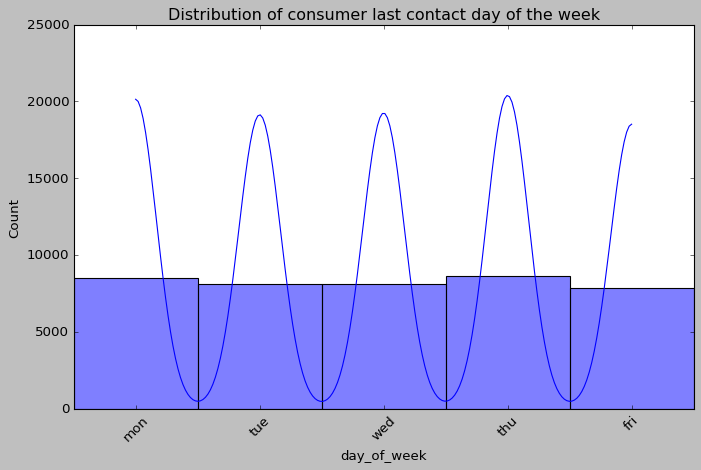

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df["day_of_week"], bins=30, kde=True)
plt.title("Distribution of consumer last contact day of the week")
plt.xticks(rotation=45)
plt.show()

We find a fair and uniform distribution throughout the days of the week.

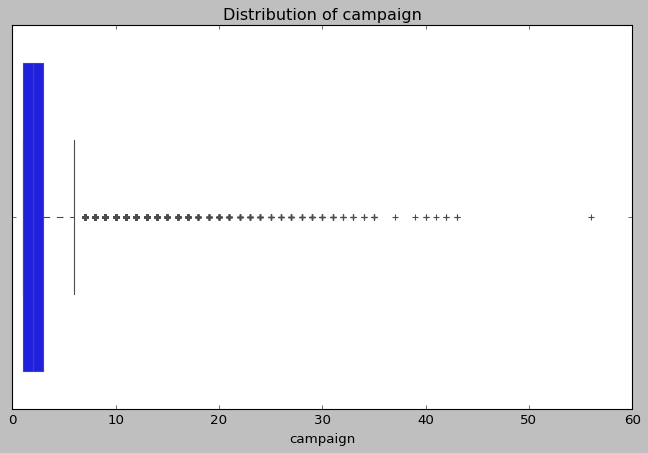

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["campaign"])
plt.title("Distribution of campaign")
plt.show()

more than 50% of the consumers fall under 1st and 2nd campaighn contact list.

Extreme outlier at 56

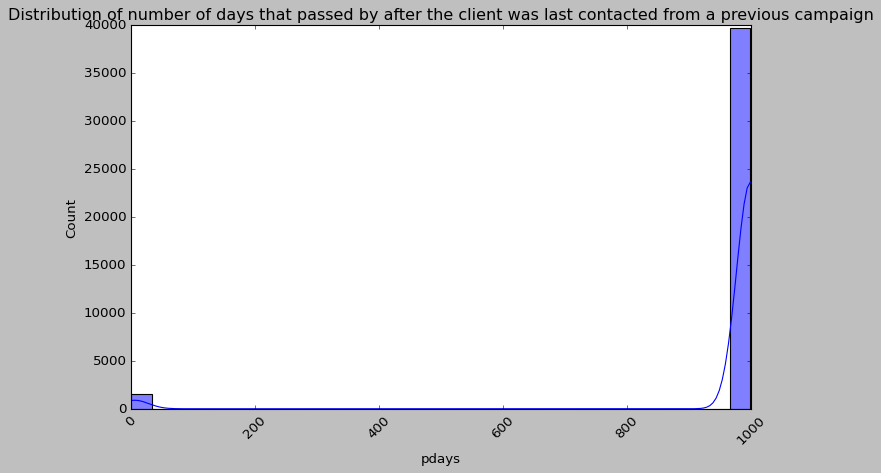

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df["pdays"], bins=30, kde=True)
plt.title("Distribution of number of days that passed by after the client was last contacted from a previous campaign")
plt.xticks(rotation=45)
plt.show()

39661 consumers have the value 999 which means they were not contacted previously.

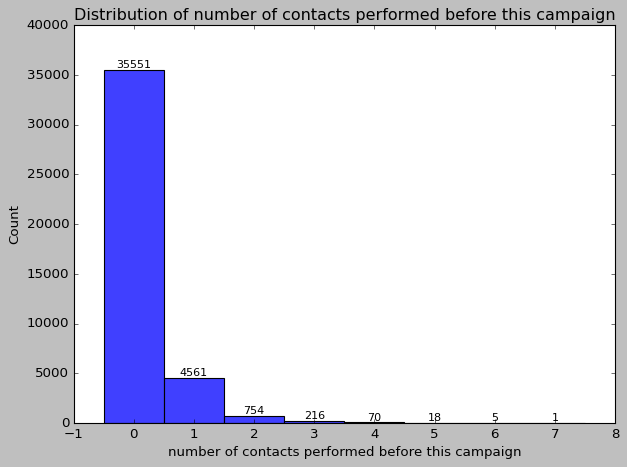

In [29]:
# Use histplot with discrete=True for categorical data
dx = sns.histplot(df['previous'], bins=8, discrete=True)

# Add count labels on top of each bar
for p in dx.patches:
    height = p.get_height()
    dx.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.title('Distribution of number of contacts performed before this campaign')
plt.xlabel('number of contacts performed before this campaign')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

35551 consumers were never contacted previously

Only 1 of them got contacted 7 times.

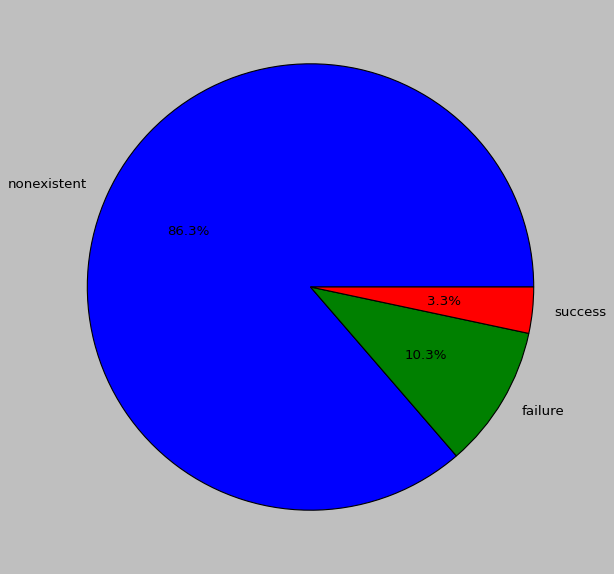

In [30]:
plt.figure(figsize=(9,9))
plt.pie(df["poutcome"].value_counts(),labels=df["poutcome"].value_counts().index,autopct='%1.1f%%')
plt.show()

The Success rate of the outcome of the previous  marketing camapighn is only 3.3%

10.3% is a clear failure

However, 86.3% of the outcome is under non-existence which needs attention.

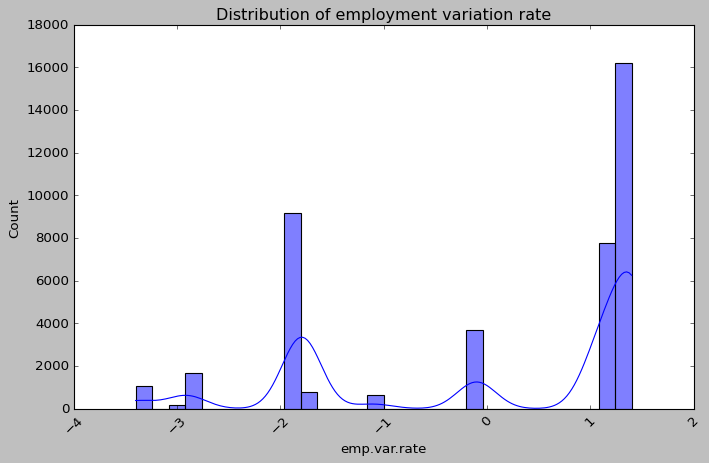

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df["emp.var.rate"], bins=30, kde=True)
plt.title("Distribution of employment variation rate")
plt.xticks(rotation=45)
plt.show()

Employment Variation rate (quarterly indicator) varies between -2 and 2 majorly.

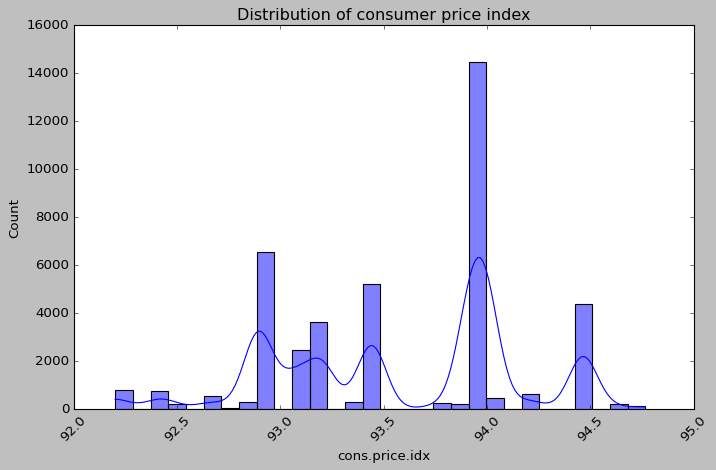

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(df["cons.price.idx"], bins=30, kde=True)
plt.title("Distribution of consumer price index")
plt.xticks(rotation=45)
plt.show()

Consumer Price Index (Monthly Indicator) varies between 93 to 94.5 majorly

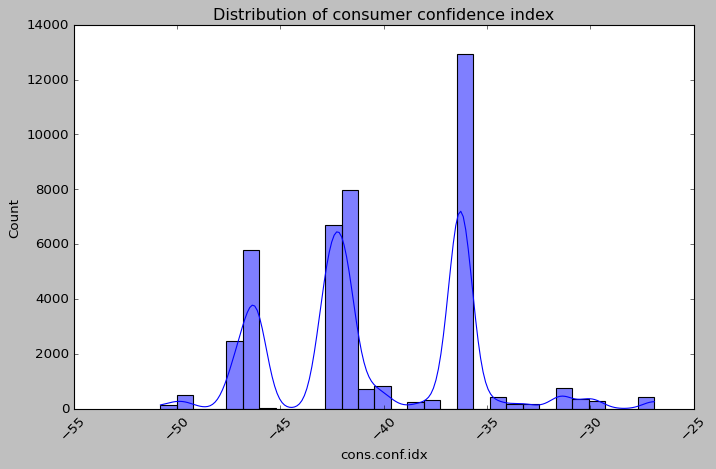

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df["cons.conf.idx"], bins=30, kde=True)
plt.title("Distribution of consumer confidence index")
plt.xticks(rotation=45)
plt.show()

Consumer confidence index (monthly indicator) majorly lies between -45 and -35

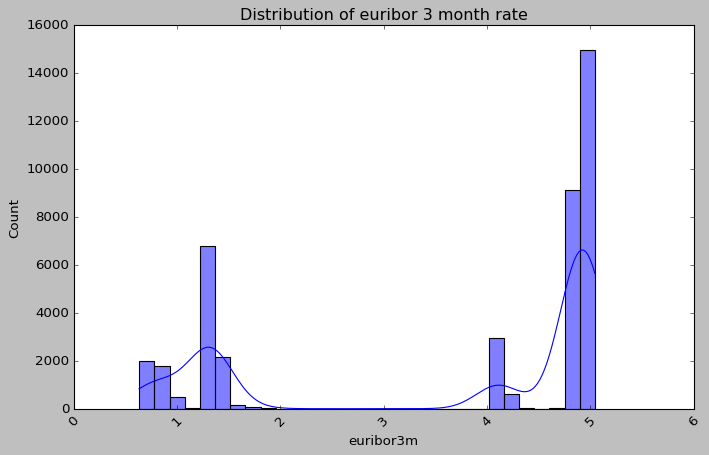

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(df["euribor3m"], bins=30, kde=True)
plt.title("Distribution of euribor 3 month rate")
plt.xticks(rotation=45)
plt.show()

euribor 3 month rate (daily indicator) shows its maximum potential between 4 and 5

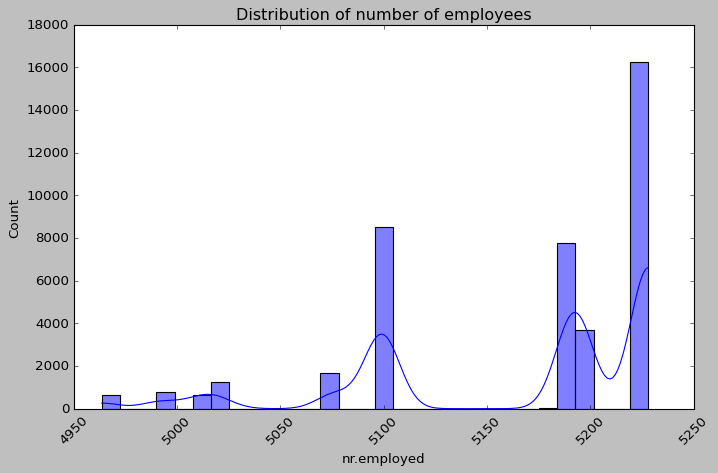

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df["nr.employed"], bins=30, kde=True)
plt.title("Distribution of number of employees")
plt.xticks(rotation=45)
plt.show()

In [36]:
df['nr.employed'].value_counts()

,count
nr.employed,
5228.1,16228
5099.1,8532
5191.0,7762
5195.8,3682
5076.2,1662
5017.5,1070
4991.6,773
5008.7,650
4963.6,635


Maximum number of employees are between 5099.1 and 5228.1

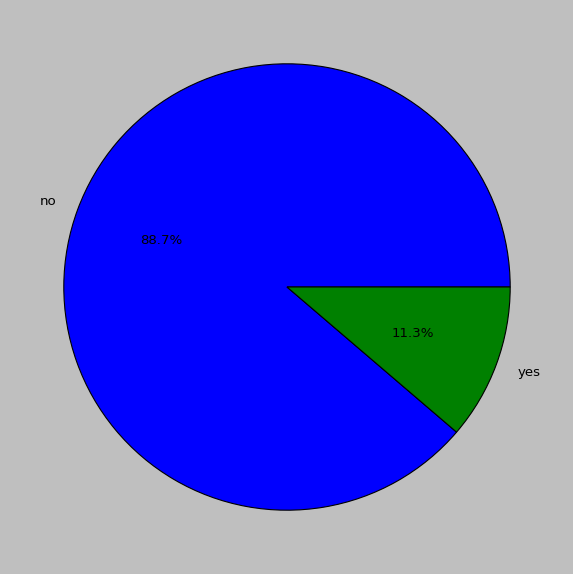

In [37]:
plt.figure(figsize=(9,9))
plt.pie(df["y"].value_counts(),labels=df["y"].value_counts().index,autopct='%1.1f%%')
plt.show()

Only 11.3% of the client have subscribed a term Deposit.

###Bivariate Analysis

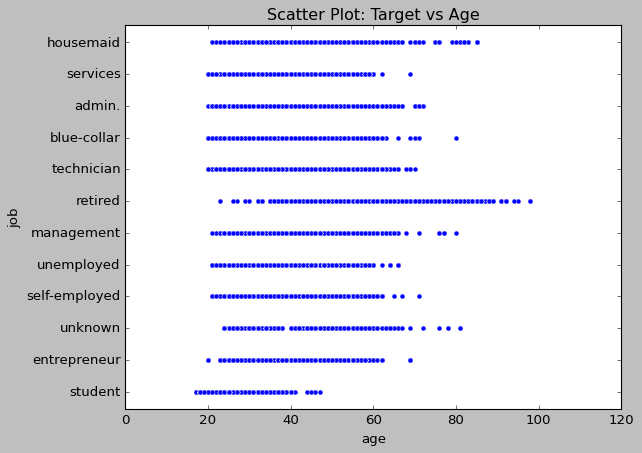

In [38]:
sns.scatterplot(x='age', y='job', data=df)
plt.title("Scatter Plot: Target vs Age")
plt.show()

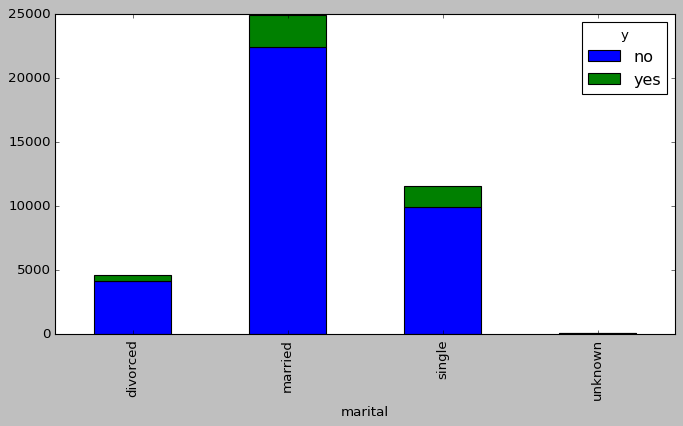

In [39]:
ct = pd.crosstab(df['marital'],df['y'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

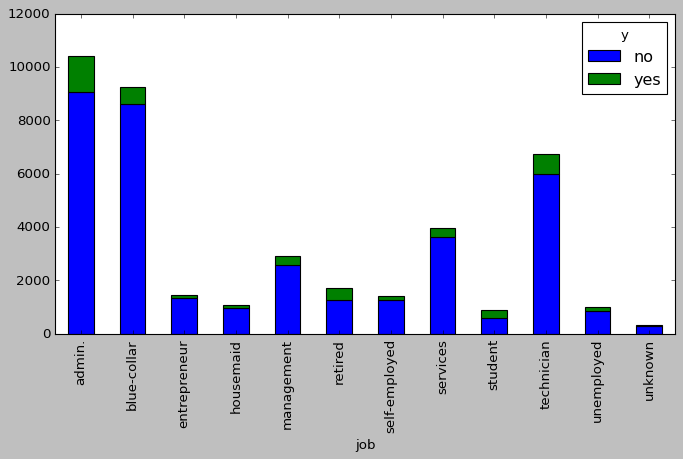

In [40]:
ct = pd.crosstab(df['job'],df['y'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

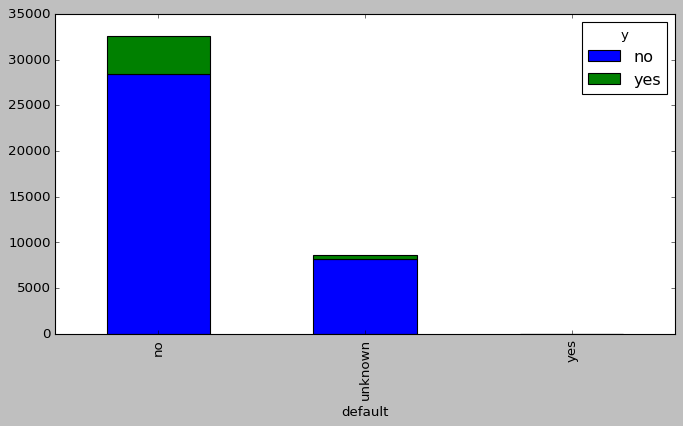

In [41]:
ct = pd.crosstab(df['default'],df['y'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

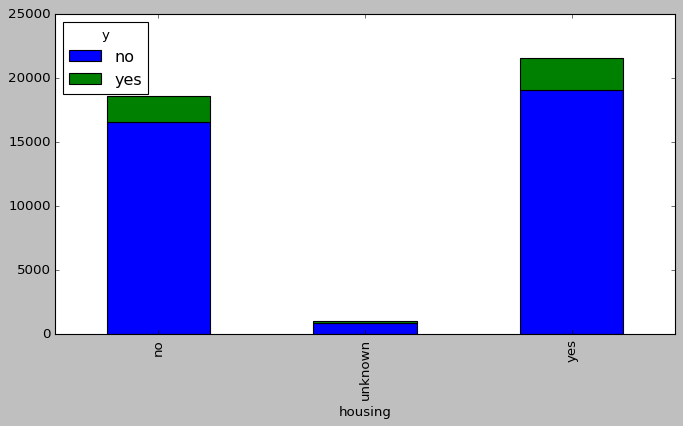

In [42]:
ct = pd.crosstab(df['housing'],df['y'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

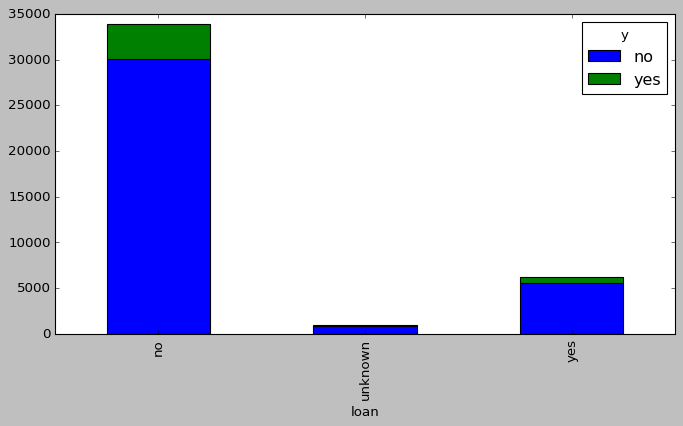

In [43]:
ct = pd.crosstab(df['loan'],df['y'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

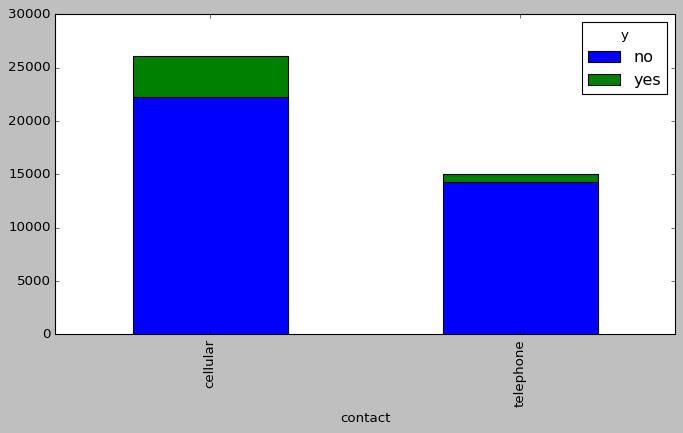

In [44]:
ct = pd.crosstab(df['contact'],df['y'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

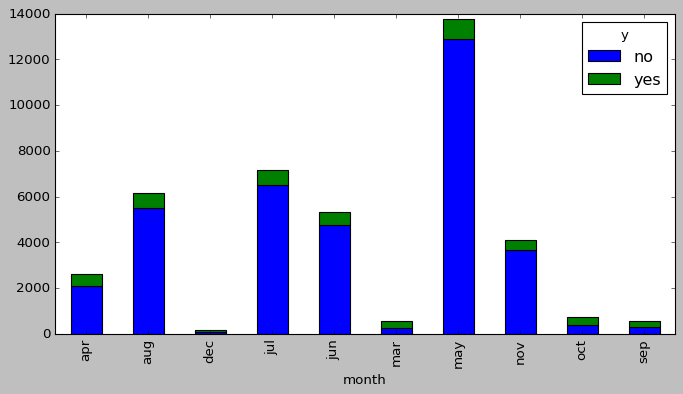

In [45]:
ct = pd.crosstab(df['month'],df['y'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

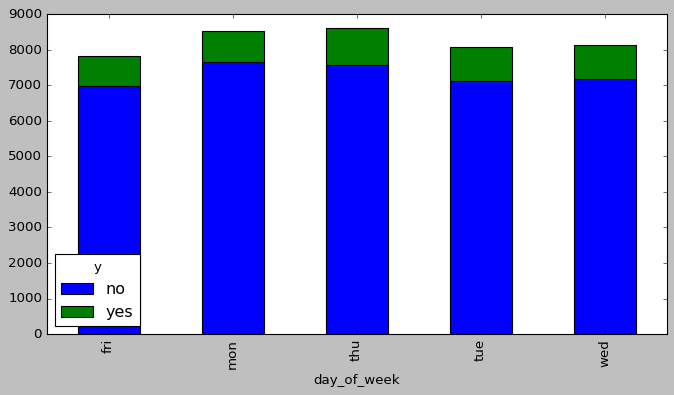

In [46]:
ct = pd.crosstab(df['day_of_week'],df['y'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

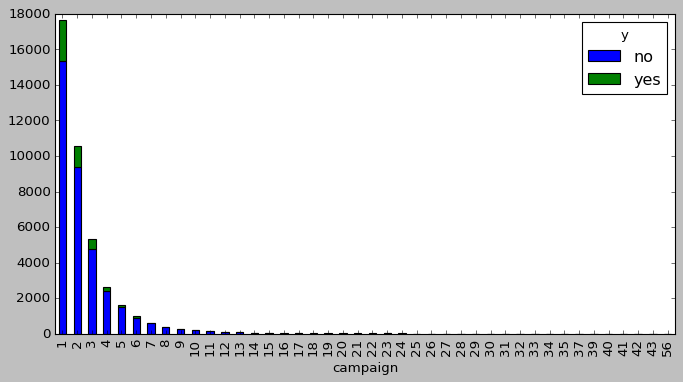

In [47]:
ct = pd.crosstab(df['campaign'],df['y'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

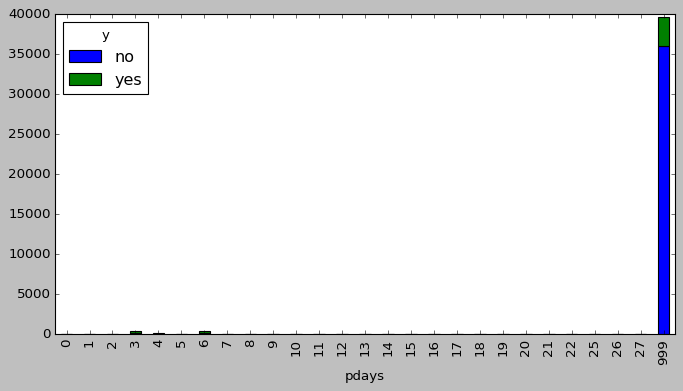

In [48]:
ct = pd.crosstab(df['pdays'],df['y'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

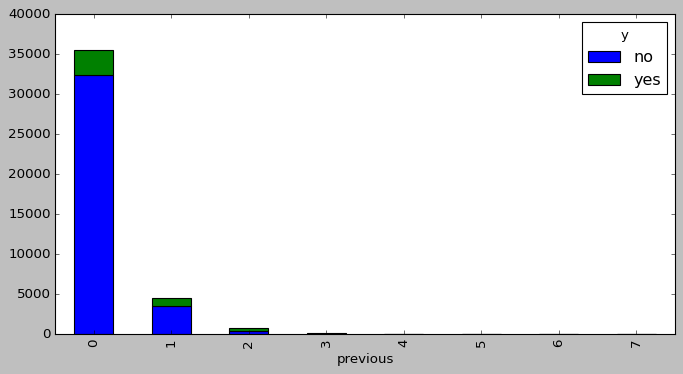

In [49]:
ct = pd.crosstab(df['previous'],df['y'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

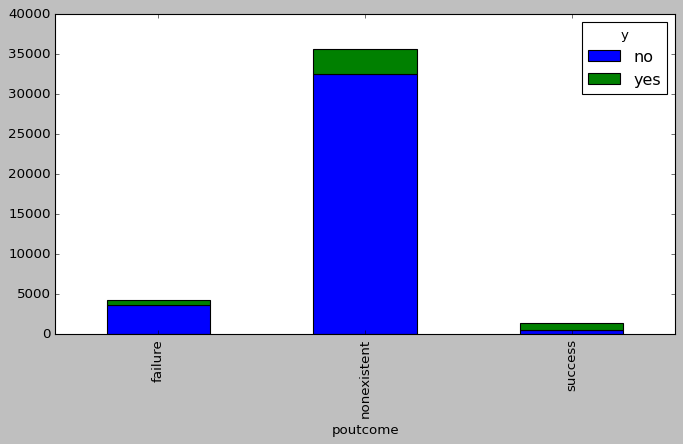

In [50]:
ct = pd.crosstab(df['poutcome'],df['y'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

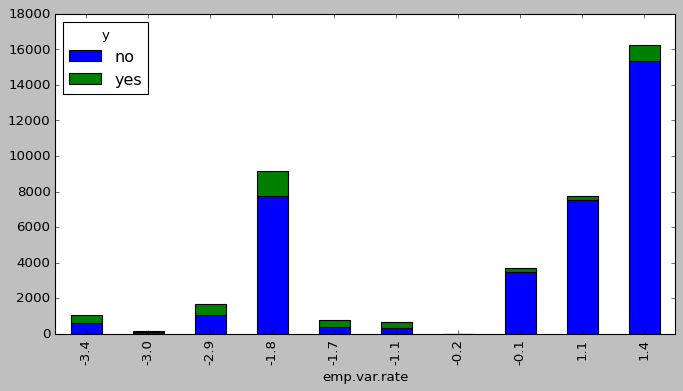

In [51]:
ct = pd.crosstab(df['emp.var.rate'],df['y'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

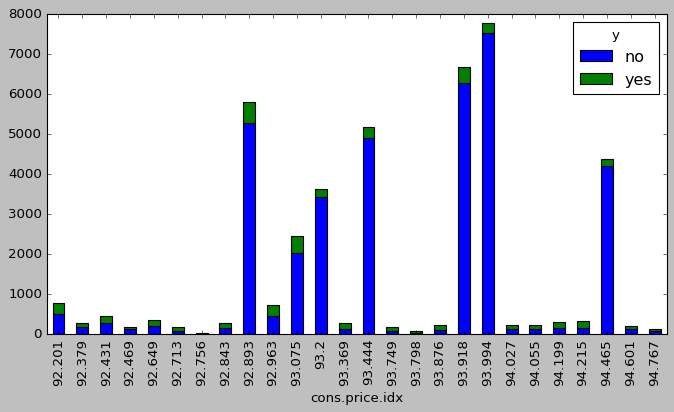

In [52]:
ct = pd.crosstab(df['cons.price.idx'],df['y'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

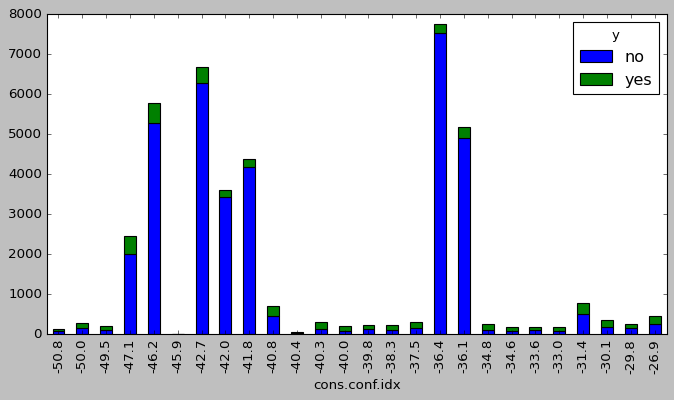

In [53]:
ct = pd.crosstab(df['cons.conf.idx'],df['y'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

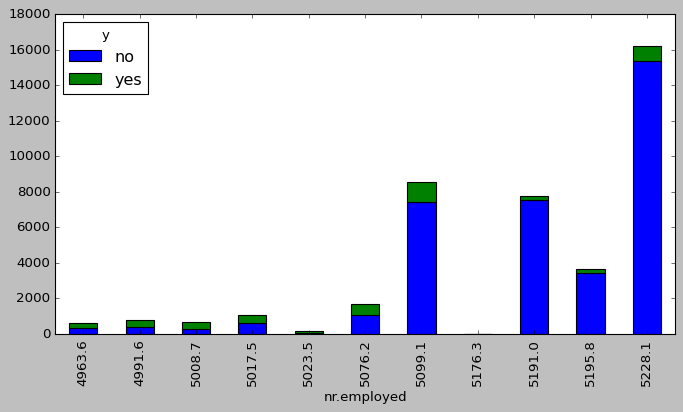

In [54]:
ct = pd.crosstab(df['nr.employed'],df['y'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

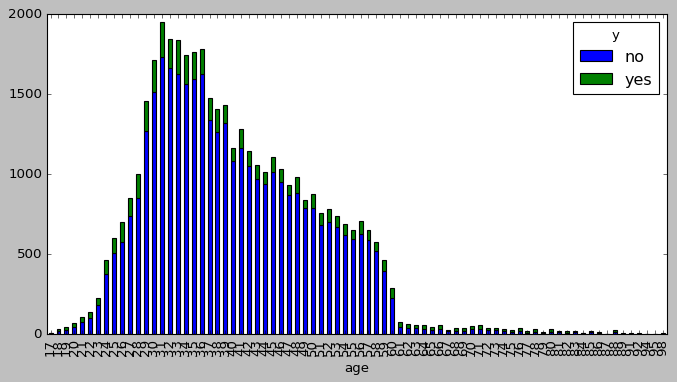

In [55]:
ct = pd.crosstab(df['age'],df['y'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

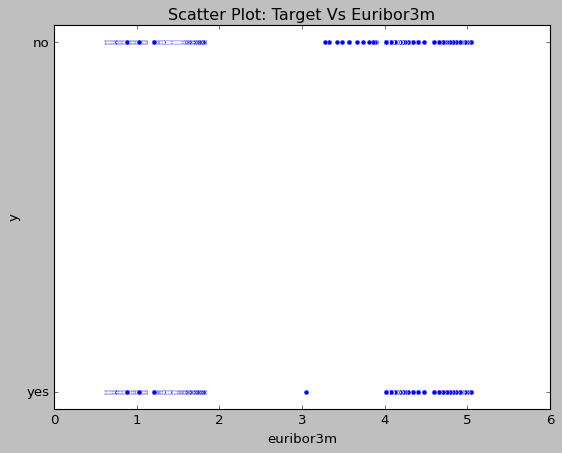

In [56]:
sns.scatterplot(x='euribor3m', y='y', data=df)
plt.title("Scatter Plot: Target Vs Euribor3m")
plt.show()

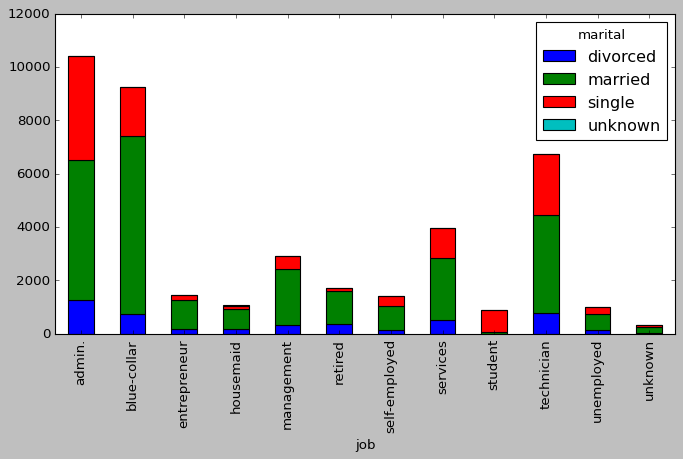

In [57]:
ct = pd.crosstab(df['job'],df['marital'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

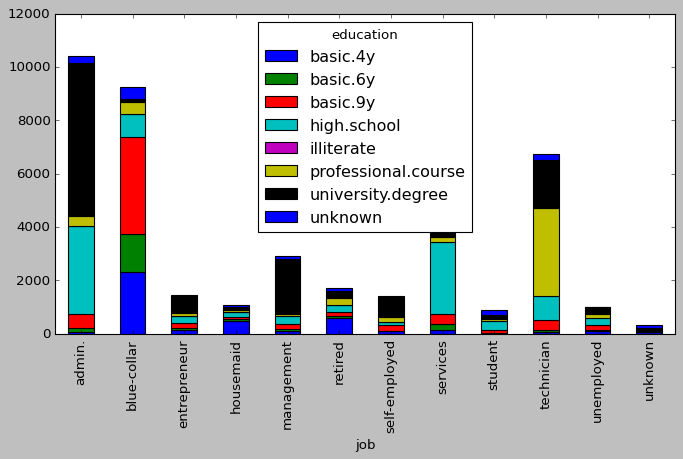

In [58]:
ct = pd.crosstab(df['job'],df['education'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

In [59]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

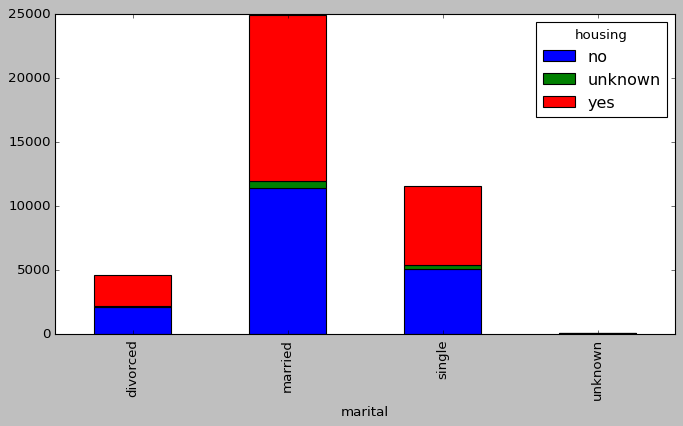

In [60]:
ct = pd.crosstab(df['marital'],df['housing'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

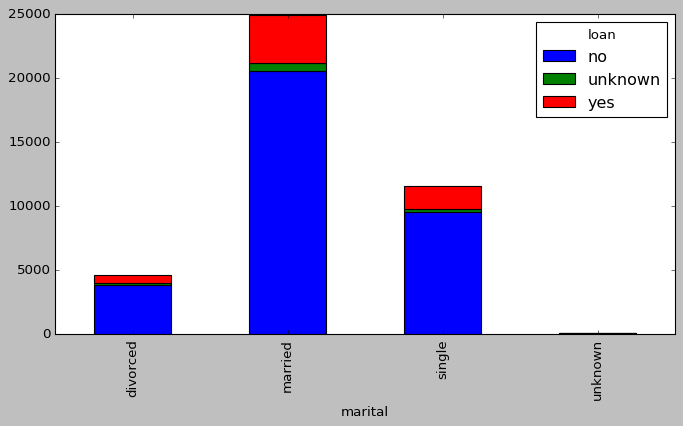

In [61]:
ct = pd.crosstab(df['marital'],df['loan'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

###Multivariate Analysis

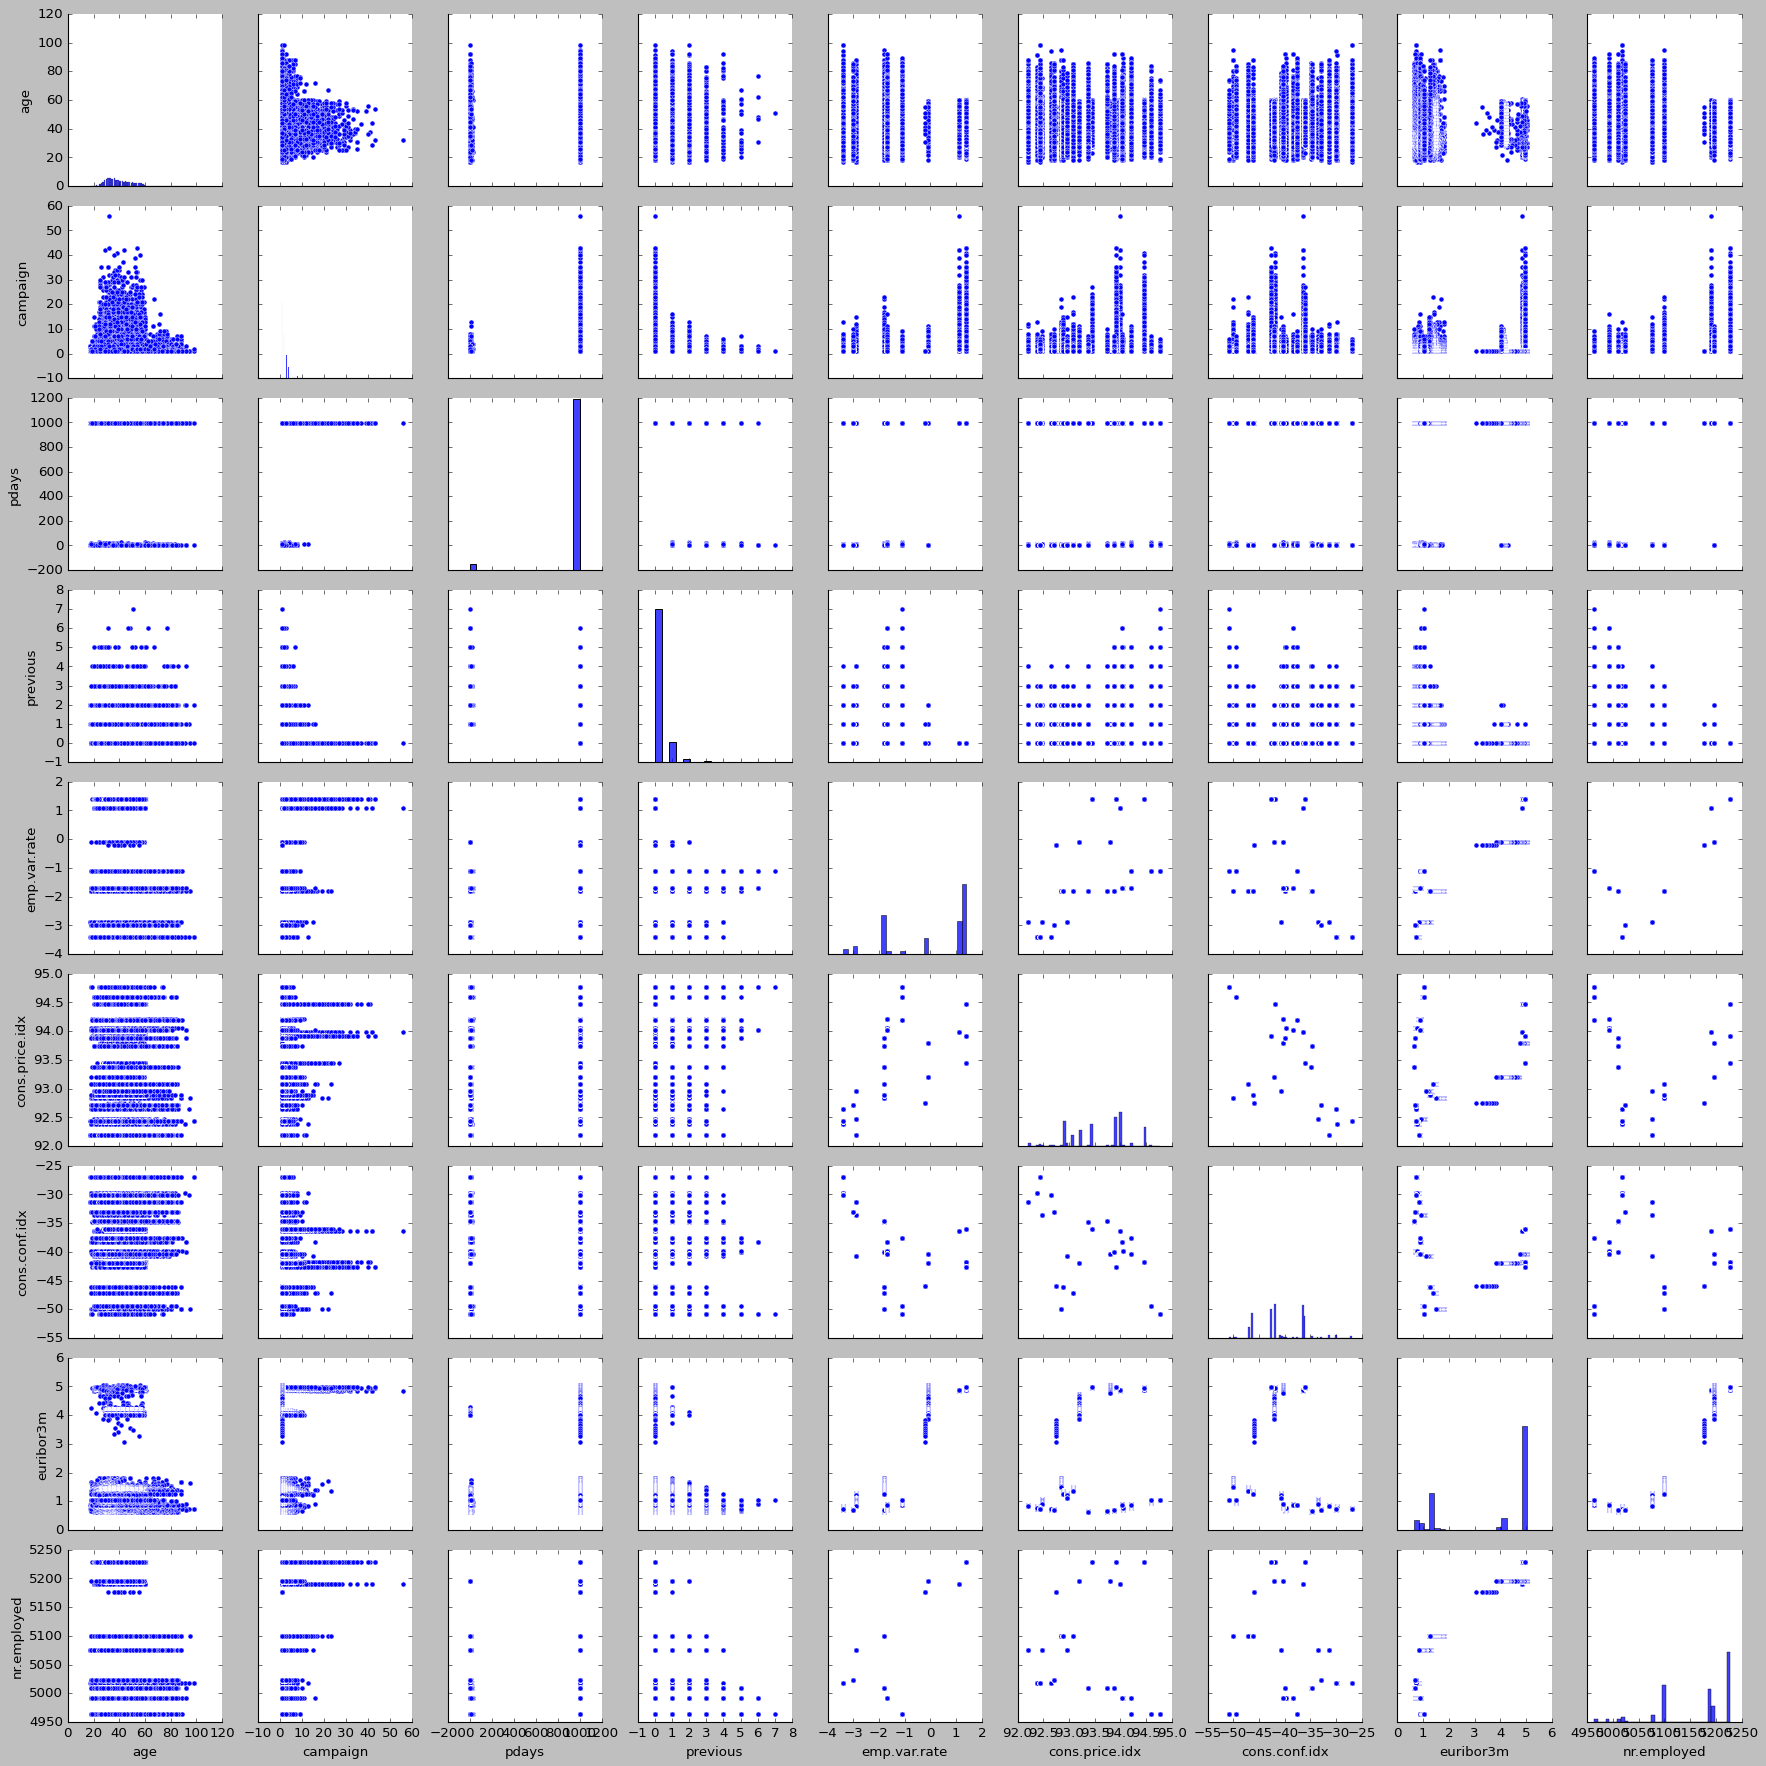

In [62]:
sns.pairplot(df)

In [63]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

###Outlier

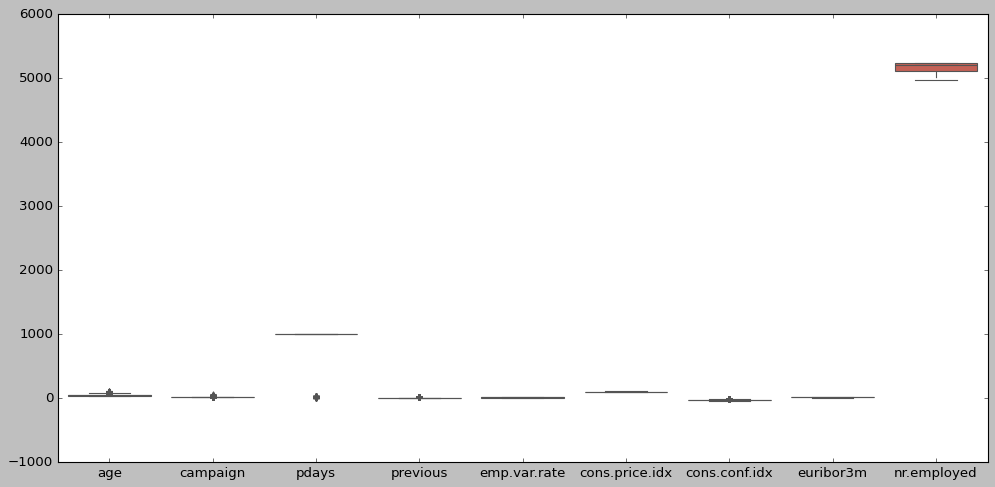

In [64]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=df, palette="coolwarm")
plt.show()

In [65]:
df.shape

(41176, 20)

In [66]:
df['y'].value_counts()

,count
y,
no,36537
yes,4639


###Splitting the Data into Train and Test

In [67]:
df['y'] = df['y'].replace({'yes': 1, 'no': 0})

<ipython-input-67-9dc15415cc11>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['y'] = df['y'].replace({'yes': 1, 'no': 0})


In [68]:
df['y'].value_counts()

,count
y,
0,36537
1,4639


In [69]:
# Copy all the predictor variables into X dataframe
X = df.drop('y', axis=1)

# Copy target into the y dataframe.
y = df['y']

In [70]:
cat=[] ## Identify categorical and numerical columns
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [71]:
# One-Hot Encode categorical variables
X_encoded = pd.get_dummies(X, columns=cat, drop_first=True)

In [72]:
# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)

In [73]:
# Print dataset sizes
print("Training Set Size:", X_train.shape[0])
print("Testing Set Size:", X_test.shape[0])

Training Set Size: 28823
Testing Set Size: 12353


In [74]:
print(y_train.value_counts())  # Check class distribution in training set
print(y_test.value_counts())   # Check class distribution in testing set


y
0    25576
1     3247
Name: count, dtype: int64
y
0    10961
1     1392
Name: count, dtype: int64


###Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
Log_model= LogisticRegression()
Log_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

In [77]:
## Performance Matrix on train data set
y_train_predict = Log_model.predict(X_train)
model_score = Log_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8993859070880894
[[25299   277]
 [ 2623   624]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     25576
           1       0.69      0.19      0.30      3247

    accuracy                           0.90     28823
   macro avg       0.80      0.59      0.62     28823
weighted avg       0.88      0.90      0.87     28823



In [78]:
## Performance Matrix on test data set
y_test_predict = Log_model.predict(X_test)
model_score = Log_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8996195256213065
[[10859   102]
 [ 1138   254]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10961
           1       0.71      0.18      0.29      1392

    accuracy                           0.90     12353
   macro avg       0.81      0.59      0.62     12353
weighted avg       0.88      0.90      0.87     12353



In [79]:
# Predict probabilities for the test set
y_probs_lr = Log_model.predict_proba(X_test)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_probs_lr)
# Calculate the AUC (Area Under the Curve)
roc_auc = metrics.auc(fpr, tpr)
print('AUC for the Test Data: %.3f' % roc_auc)

AUC for the Test Data: 0.782


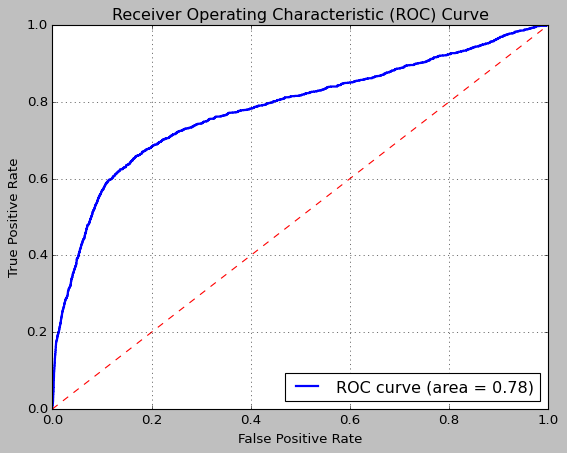

In [80]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [81]:
# Predict probabilities for the train set
y_probs_lr1 = Log_model.predict_proba(X_train)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_train, y_probs_lr1)
# Calculate the AUC (Area Under the Curve)
roc_auc1 = metrics.auc(fpr1, tpr1)
print('AUC for the Train Data: %.3f' % roc_auc1)

AUC for the Train Data: 0.768


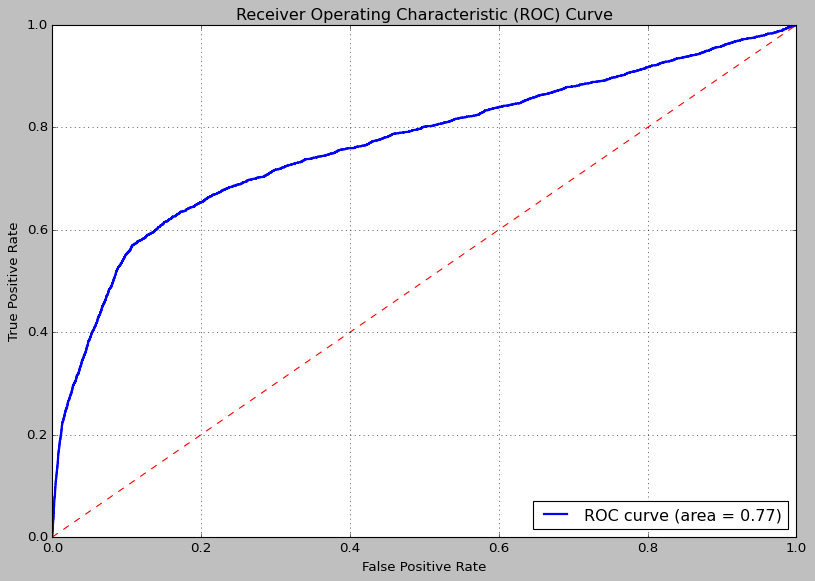

In [82]:
# Plot the ROC curve
plt.figure(figsize=(12, 8))
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'ROC curve (area = {roc_auc1:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

###Linear Discriminant Analysis

In [83]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [84]:
clf = LinearDiscriminantAnalysis() ##Build LDA Model
lda_model=clf.fit(X_train,y_train)

In [85]:
## Performance Matrix on train data set
y_train_predict_lda = clf.predict(X_train)
model_score = clf.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_lda))
print(metrics.classification_report(y_train, y_train_predict_lda))

0.8911633070811504
[[24492  1084]
 [ 2053  1194]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     25576
           1       0.52      0.37      0.43      3247

    accuracy                           0.89     28823
   macro avg       0.72      0.66      0.69     28823
weighted avg       0.88      0.89      0.88     28823



In [86]:
## Performance Matrix on test data set
y_test_predict_lda = clf.predict(X_test)
model_score = clf.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_lda))
print(metrics.classification_report(y_test, y_test_predict_lda))

0.8906338541245041
[[10500   461]
 [  890   502]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     10961
           1       0.52      0.36      0.43      1392

    accuracy                           0.89     12353
   macro avg       0.72      0.66      0.68     12353
weighted avg       0.88      0.89      0.88     12353



In [87]:
# Predict probabilities for the test set
y_probs_lda = clf.predict_proba(X_test)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, y_probs_lda)
# Calculate the AUC (Area Under the Curve)
roc_auc2 = metrics.auc(fpr2, tpr2)
print('AUC for the Test Data: %.3f' % roc_auc2)

AUC for the Test Data: 0.800


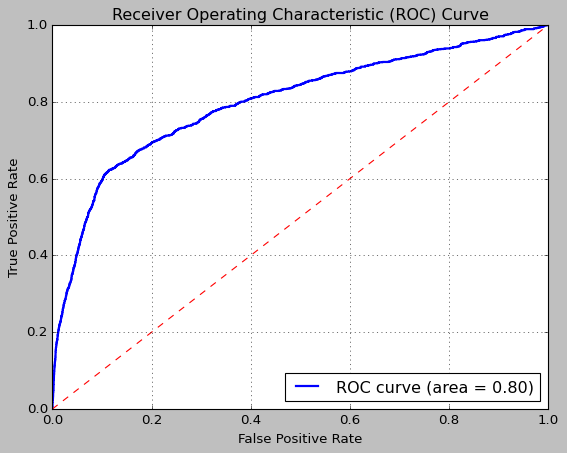

In [88]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr2, tpr2, color='blue', lw=2, label=f'ROC curve (area = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [89]:
# Predict probabilities for the train set
y_probs_lda1 = clf.predict_proba(X_train)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_train, y_probs_lda1)
# Calculate the AUC (Area Under the Curve)
roc_auc3 = metrics.auc(fpr3, tpr3)
print('AUC for the Train Data: %.3f' % roc_auc3)

AUC for the Train Data: 0.788


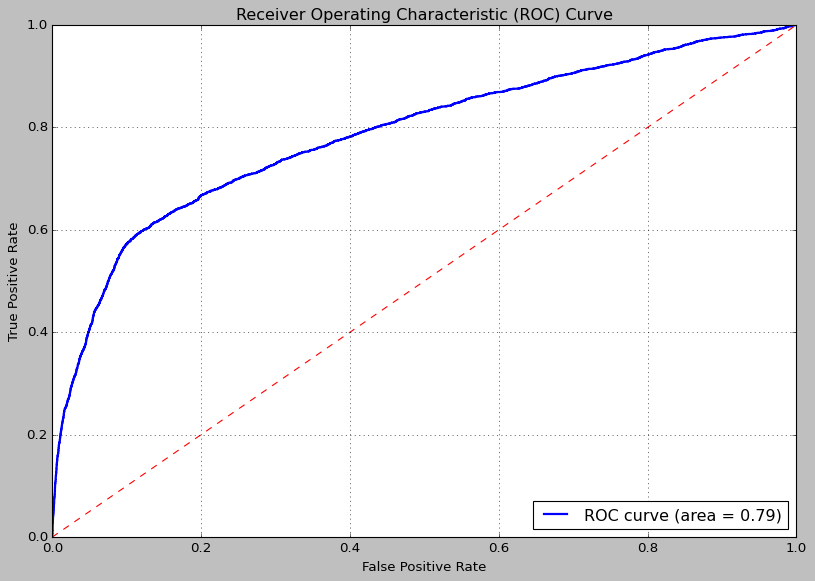

In [90]:
# Plot the ROC curve
plt.figure(figsize=(12, 8))
plt.plot(fpr3, tpr3, color='blue', lw=2, label=f'ROC curve (area = {roc_auc3:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

###Decision Tree Classifier - CART Model

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [92]:
dtc = DecisionTreeClassifier(criterion='gini', random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [93]:
## Performance Matrix on train data set
y_train_predict_dtc = dtc.predict(X_train)
model_score = dtc.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_dtc))
print(metrics.classification_report(y_train, y_train_predict_dtc))

0.9961836033723068
[[25573     3]
 [  107  3140]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25576
           1       1.00      0.97      0.98      3247

    accuracy                           1.00     28823
   macro avg       1.00      0.98      0.99     28823
weighted avg       1.00      1.00      1.00     28823



In [94]:
## Performance Matrix on test data set
y_test_predict_dtc = dtc.predict(X_test)
model_score = dtc.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_dtc))
print(metrics.classification_report(y_test, y_test_predict_dtc))

0.8397150489759573
[[9901 1060]
 [ 920  472]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91     10961
           1       0.31      0.34      0.32      1392

    accuracy                           0.84     12353
   macro avg       0.61      0.62      0.62     12353
weighted avg       0.85      0.84      0.84     12353



In [95]:
# Predict probabilities for the test set
y_probs_dtc = dtc.predict_proba(X_test)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr4, tpr4, thresholds4 = metrics.roc_curve(y_test, y_probs_dtc)
# Calculate the AUC (Area Under the Curve)
roc_auc4 = metrics.auc(fpr4, tpr4)
print('AUC for the Test Data: %.3f' % roc_auc4)

AUC for the Test Data: 0.623


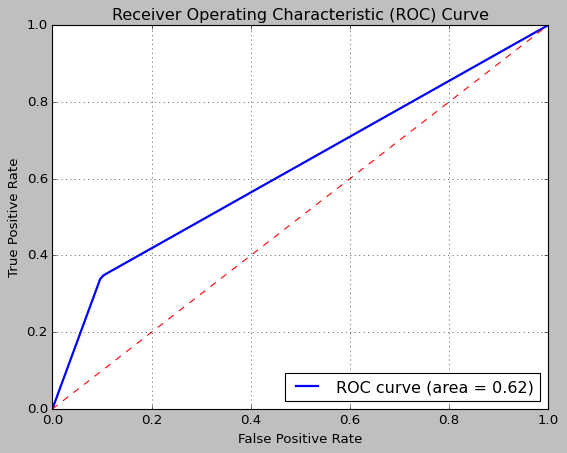

In [96]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr4, tpr4, color='blue', lw=2, label=f'ROC curve (area = {roc_auc4:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [97]:
# Predict probabilities for the train set
y_probs_dtc1 = dtc.predict_proba(X_train)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr5, tpr5, thresholds5 = metrics.roc_curve(y_train, y_probs_dtc1)
# Calculate the AUC (Area Under the Curve)
roc_auc5 = metrics.auc(fpr5, tpr5)
print('AUC for the Train Data: %.3f' % roc_auc5)

AUC for the Train Data: 1.000


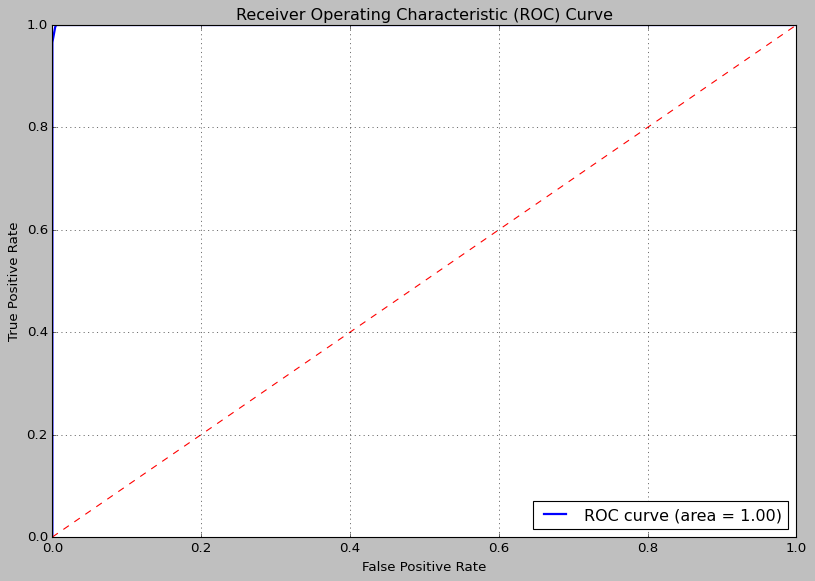

In [98]:
# Plot the ROC curve
plt.figure(figsize=(12, 8))
plt.plot(fpr5, tpr5, color='blue', lw=2, label=f'ROC curve (area = {roc_auc5:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

###Naive Bayes Model

In [99]:
from sklearn.naive_bayes import GaussianNB

In [100]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [101]:
## Performance Matrix on train data set
y_train_predict_gnb = gnb.predict(X_train)
model_score = gnb.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_gnb))
print(metrics.classification_report(y_train, y_train_predict_gnb))

0.86753634250425
[[23600  1976]
 [ 1842  1405]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     25576
           1       0.42      0.43      0.42      3247

    accuracy                           0.87     28823
   macro avg       0.67      0.68      0.67     28823
weighted avg       0.87      0.87      0.87     28823



In [102]:
## Performance Matrix on test data set
y_test_predict_gnb = gnb.predict(X_test)
model_score = gnb.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_gnb))
print(metrics.classification_report(y_test, y_test_predict_gnb))

0.8702339512668987
[[10126   835]
 [  768   624]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     10961
           1       0.43      0.45      0.44      1392

    accuracy                           0.87     12353
   macro avg       0.68      0.69      0.68     12353
weighted avg       0.87      0.87      0.87     12353



In [103]:
# Predict probabilities for the train set
y_probs_gnb1 = gnb.predict_proba(X_train)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr6, tpr6, thresholds6 = metrics.roc_curve(y_train, y_probs_gnb1)
# Calculate the AUC (Area Under the Curve)
roc_auc6 = metrics.auc(fpr6, tpr6)
print('AUC for the Train Data: %.3f' % roc_auc6)

AUC for the Train Data: 0.763


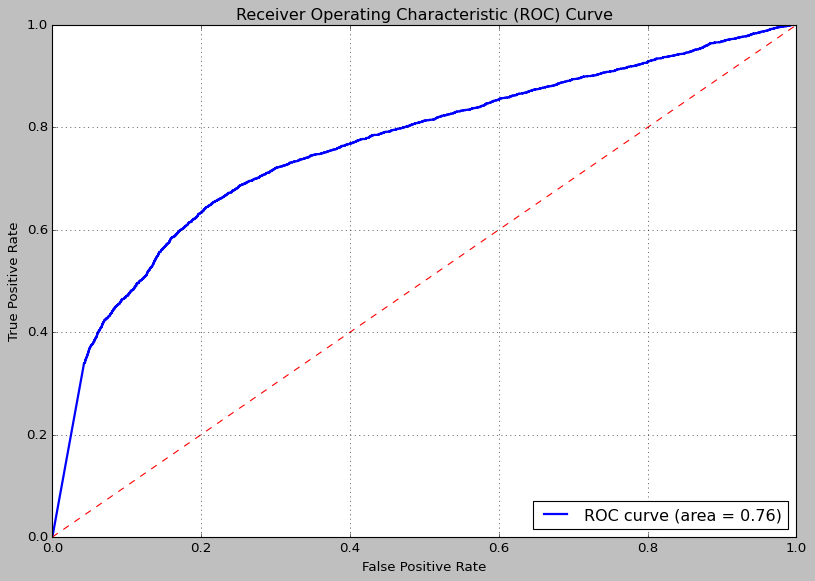

In [104]:
# Plot the ROC curve
plt.figure(figsize=(12, 8))
plt.plot(fpr6, tpr6, color='blue', lw=2, label=f'ROC curve (area = {roc_auc6:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [105]:
# Predict probabilities for the test set
y_probs_gnb = gnb.predict_proba(X_test)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr7, tpr7, thresholds7 = metrics.roc_curve(y_test, y_probs_gnb)
# Calculate the AUC (Area Under the Curve)
roc_auc7 = metrics.auc(fpr7, tpr7)
print('AUC for the Test Data: %.3f' % roc_auc7)

AUC for the Test Data: 0.775


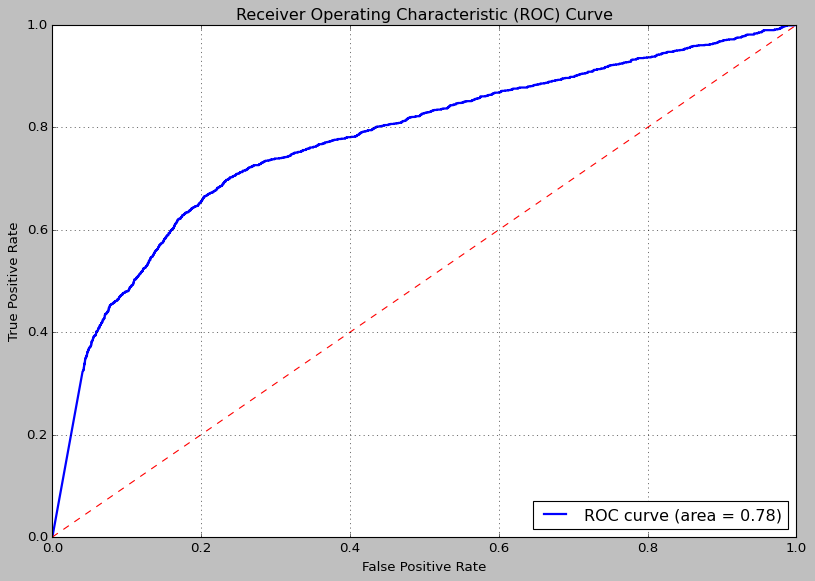

In [106]:
# Plot the ROC curve
plt.figure(figsize=(12, 8))
plt.plot(fpr7, tpr7, color='blue', lw=2, label=f'ROC curve (area = {roc_auc7:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

###KNN Model

In [107]:
from sklearn.neighbors import KNeighborsClassifier

KNN =KNeighborsClassifier()
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [108]:
## Performance Matrix on train data set
y_train_predict_KNN = KNN.predict(X_train)
model_score = KNN.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_KNN))
print(metrics.classification_report(y_train, y_train_predict_KNN))

0.9121881830482601
[[25035   541]
 [ 1990  1257]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     25576
           1       0.70      0.39      0.50      3247

    accuracy                           0.91     28823
   macro avg       0.81      0.68      0.73     28823
weighted avg       0.90      0.91      0.90     28823



In [109]:
## Performance Matrix on test data set
y_test_predict_KNN = KNN.predict(X_test)
model_score = KNN.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_KNN))
print(metrics.classification_report(y_test, y_test_predict_KNN))

0.8899862381607707
[[10589   372]
 [  987   405]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10961
           1       0.52      0.29      0.37      1392

    accuracy                           0.89     12353
   macro avg       0.72      0.63      0.66     12353
weighted avg       0.87      0.89      0.88     12353



In [110]:
# Predict probabilities for the train set
y_probs_KNN1 = KNN.predict_proba(X_train)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr8, tpr8, thresholds8 = metrics.roc_curve(y_train, y_probs_KNN1)
# Calculate the AUC (Area Under the Curve)
roc_auc8 = metrics.auc(fpr8, tpr8)
print('AUC for the Train Data: %.3f' % roc_auc8)

AUC for the Train Data: 0.926


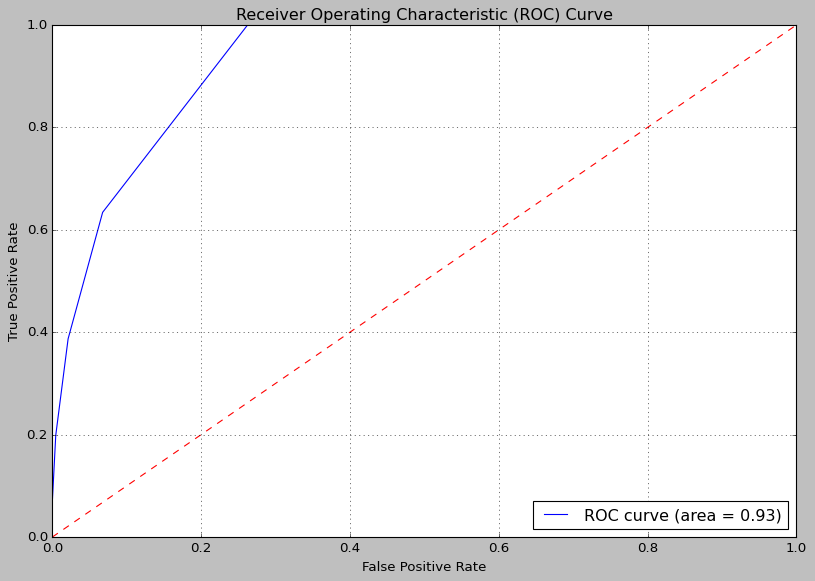

In [111]:
# Plot the ROC curve
plt.figure(figsize=(12, 8))
plt.plot(fpr8, tpr8, color='blue', lw=1, label=f'ROC curve (area = {roc_auc8:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [112]:
# Predict probabilities for the test set
y_probs_KNN = KNN.predict_proba(X_test)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr9, tpr9, thresholds9 = metrics.roc_curve(y_test, y_probs_KNN)
# Calculate the AUC (Area Under the Curve)
roc_auc9 = metrics.auc(fpr9, tpr9)
print('AUC for the Test Data: %.3f' % roc_auc9)

AUC for the Test Data: 0.736


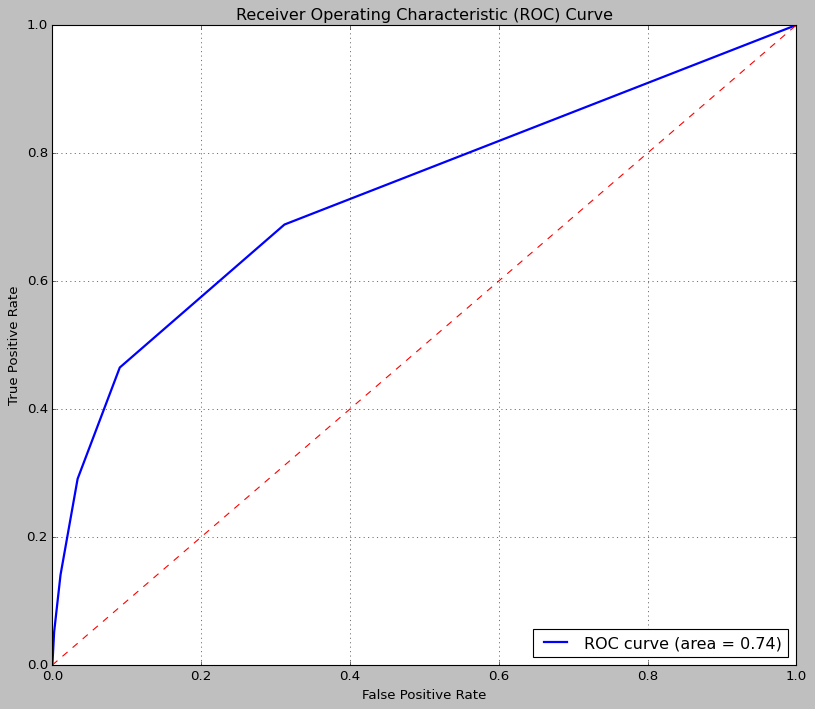

In [113]:
# Plot the ROC curve
plt.figure(figsize=(12, 10))
plt.plot(fpr9, tpr9, color='blue', lw=2, label=f'ROC curve (area = {roc_auc9:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

###Random Forest Model

In [114]:
from sklearn.ensemble import RandomForestClassifier

RF =RandomForestClassifier(n_estimators=100,random_state=1)
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [115]:
## Performance Matrix on train data set
y_train_predict_RF = RF.predict(X_train)
model_score = RF.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_RF))
print(metrics.classification_report(y_train, y_train_predict_RF))

0.9961836033723068
[[25554    22]
 [   88  3159]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25576
           1       0.99      0.97      0.98      3247

    accuracy                           1.00     28823
   macro avg       0.99      0.99      0.99     28823
weighted avg       1.00      1.00      1.00     28823



In [116]:
## Performance Matrix on test data set
y_test_predict_RF = RF.predict(X_test)
model_score = RF.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_RF))
print(metrics.classification_report(y_test, y_test_predict_RF))

0.8913624220837043
[[10643   318]
 [ 1024   368]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10961
           1       0.54      0.26      0.35      1392

    accuracy                           0.89     12353
   macro avg       0.72      0.62      0.65     12353
weighted avg       0.87      0.89      0.87     12353



In [117]:
# Predict probabilities for the train set
y_probs_RF1 = RF.predict_proba(X_train)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr10, tpr10, thresholds10 = metrics.roc_curve(y_train, y_probs_RF1)
# Calculate the AUC (Area Under the Curve)
roc_auc10 = metrics.auc(fpr10, tpr10)
print('AUC for the Train Data: %.3f' % roc_auc10)

AUC for the Train Data: 1.000


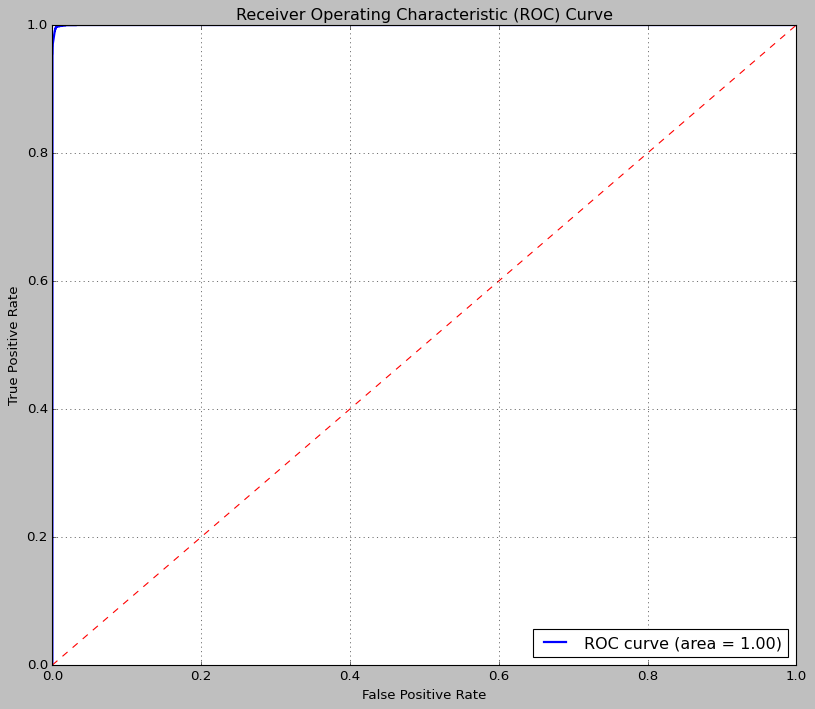

In [118]:
# Plot the ROC curve
plt.figure(figsize=(12, 10))
plt.plot(fpr10, tpr10, color='blue', lw=2, label=f'ROC curve (area = {roc_auc10:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [119]:
# Predict probabilities for the test set
y_probs_RF = RF.predict_proba(X_test)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr11, tpr11, thresholds11 = metrics.roc_curve(y_test, y_probs_RF)
# Calculate the AUC (Area Under the Curve)
roc_auc11 = metrics.auc(fpr11, tpr11)
print('AUC for the Test Data: %.3f' % roc_auc11)

AUC for the Test Data: 0.779


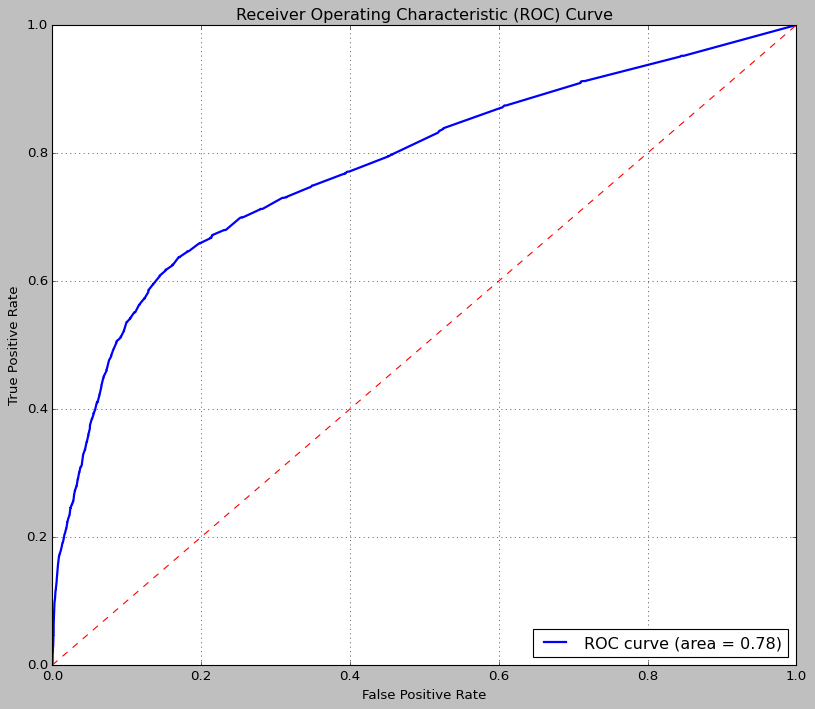

In [120]:
# Plot the ROC curve
plt.figure(figsize=(12, 10))
plt.plot(fpr11, tpr11, color='blue', lw=2, label=f'ROC curve (area = {roc_auc11:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

###Boosting Classifier Model using Gradient Boost

In [121]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [122]:
## Performance Matrix on train data set
y_train_predict_gb = gb.predict(X_train)
model_score = gb.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_gb))
print(metrics.classification_report(y_train, y_train_predict_gb))

0.9066717551955036
[[25250   326]
 [ 2364   883]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     25576
           1       0.73      0.27      0.40      3247

    accuracy                           0.91     28823
   macro avg       0.82      0.63      0.67     28823
weighted avg       0.89      0.91      0.89     28823



In [123]:
## Performance Matrix on test data set
y_test_predict_gb = gb.predict(X_test)
model_score = gb.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_gb))
print(metrics.classification_report(y_test, y_test_predict_gb))

0.9008338055533069
[[10799   162]
 [ 1063   329]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10961
           1       0.67      0.24      0.35      1392

    accuracy                           0.90     12353
   macro avg       0.79      0.61      0.65     12353
weighted avg       0.88      0.90      0.88     12353



In [124]:
# Predict probabilities for the train set
y_probs_gb1 = gb.predict_proba(X_train)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr12, tpr12, thresholds12 = metrics.roc_curve(y_train, y_probs_gb1)
# Calculate the AUC (Area Under the Curve)
roc_auc12 = metrics.auc(fpr12, tpr12)
print('AUC for the Train Data: %.3f' % roc_auc12)

AUC for the Train Data: 0.804


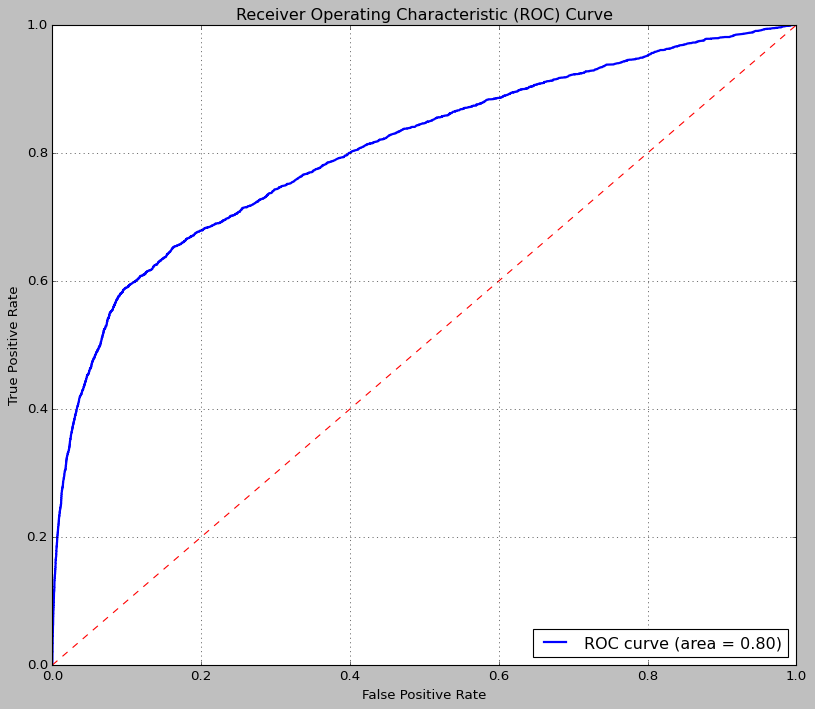

In [125]:
# Plot the ROC curve
plt.figure(figsize=(12, 10))
plt.plot(fpr12, tpr12, color='blue', lw=2, label=f'ROC curve (area = {roc_auc12:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [126]:
# Predict probabilities for the test set
y_probs_gb = gb.predict_proba(X_test)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr13, tpr13, thresholds13 = metrics.roc_curve(y_test, y_probs_gb)
# Calculate the AUC (Area Under the Curve)
roc_auc13 = metrics.auc(fpr13, tpr13)
print('AUC for the Test Data: %.3f' % roc_auc13)

AUC for the Test Data: 0.808


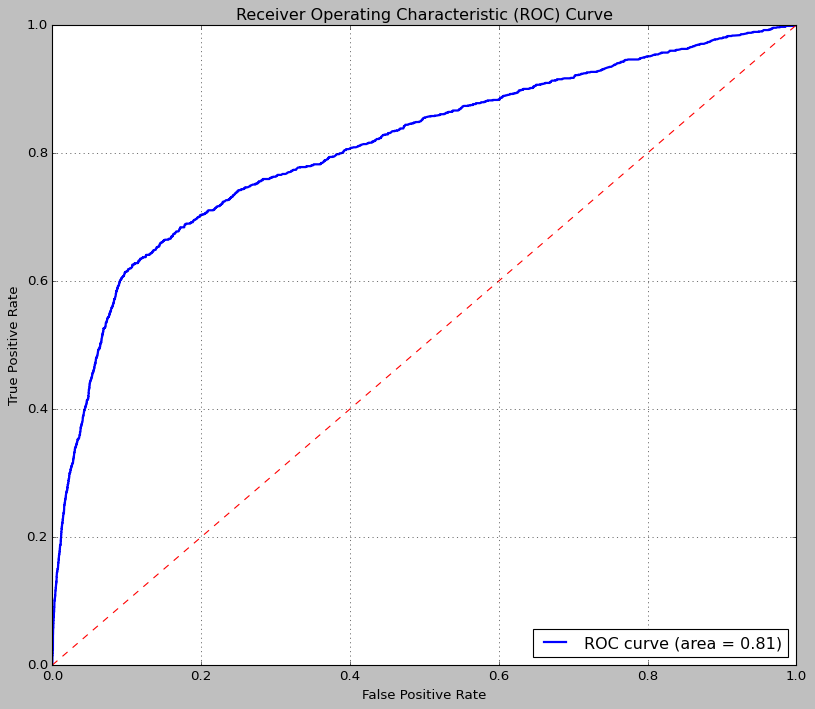

In [127]:
# Plot the ROC curve
plt.figure(figsize=(12, 10))
plt.plot(fpr13, tpr13, color='blue', lw=2, label=f'ROC curve (area = {roc_auc13:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Logistic Regression Model**


1.   Accuracy for train Dataset - 90%
2.   Accuracy for test Dataset - 90%
4.   Recall for train Dataset - 19%
5. Recall for test Dataset - 18%
6.  AUC for train Dataset - 77%
7. AUC for test Dataset - 78%


**Linear Discriminant Analysis**


1.   Accuracy for train Dataset - 89%
3.   Accuracy for test Dataset - 89%
4.   Recall for train Dataset - 37%
5. Recall for test Dataset - 36%
6.  AUC for train Dataset - 79%
7. AUC for test Dataset - 80%


**Decision Tree Classifier - CART Model**

1.   Accuracy for train Dataset - 100%
2.   Accuracy for test Dataset - 84%
5.   Recall for train Dataset - 97%
6. Recall for test Dataset - 34%
7.  AUC for train Dataset - 100%
8. AUC for test Dataset - 62%



**Naive Bayes Model**

1.   Accuracy for train Dataset - 87%
2.   Accuracy for test Dataset - 87%
5.   Recall for train Dataset - 43%
6. Recall for test Dataset - 45%
7.  AUC for train Dataset - 76%
8. AUC for test Dataset - 78%

**KNN Model**

1.   Accuracy for train Dataset - 91%
2.   Accuracy for test Dataset - 89%
5.   Recall for train Dataset - 39%
6. Recall for test Dataset - 29%
7.  AUC for train Dataset - 93%
8. AUC for test Dataset - 74%

**Random Forest Model**

1.   Accuracy for train Dataset - 100%
2.   Accuracy for test Dataset - 89%
5.   Recall for train Dataset - 97%
6. Recall for test Dataset - 26%
7.  AUC for train Dataset - 100%
8. AUC for test Dataset - 78%

**Boosting Classifier Model using Gradient Boost**

1.   Accuracy for train Dataset - 91%
2.   Accuracy for test Dataset - 90%
5.   Recall for train Dataset - 27%
6. Recall for test Dataset - 24%
7.  AUC for train Dataset - 80%
8. AUC for test Dataset - 81%

As we compare all the seven models built for this dataset we find that Logistic Regression model and Boosting classifier model using gradient boost to be working fairly well giving an acucuracy of 90%. However the gradient boost model is slightly better than Logistic Regression as the Recall value for gradient boost is better than Logistic Regression. AUC score for both training and test datasets are also better in case of Gradient boost.

LDA , Naive Bayes and KNN models are average performing models.

We see a discriminant difference between the accuracy score of training and test datatsets in Decision tree classifier having 100% accuracy for training but 84% accuracy for test dataset. On the other hand the Random Forest model having 100% accuracy for training dataset but 89% accuracy for test dataset.

###Important Features

In [128]:
feature_importance = RF.feature_importances_
print(feature_importance)

[1.71581716e-01 8.44519922e-02 3.89777752e-02 1.82638905e-02
 2.00953197e-02 2.06362660e-02 2.88664424e-02 1.26484543e-01
 5.74743550e-02 1.40791092e-02 6.86109967e-03 5.43292726e-03
 1.07340666e-02 8.69913866e-03 7.17955200e-03 1.12664695e-02
 5.56114359e-03 1.72313788e-02 5.26566820e-03 2.81500092e-03
 2.08294693e-02 1.78766639e-02 9.34975755e-04 7.56520329e-03
 1.23624765e-02 1.77844041e-02 4.39221627e-04 1.23671044e-02
 1.76541132e-02 7.80944422e-03 1.49348303e-02 1.42361741e-06
 3.55946586e-03 3.86666807e-02 3.58539387e-03 2.45917174e-02
 1.49607832e-02 2.18609533e-03 1.04254883e-03 2.57373125e-03
 2.17220420e-03 4.26175151e-03 5.09142481e-03 2.13100426e-03
 5.03417403e-03 2.19302334e-03 1.71183638e-02 1.64089029e-02
 1.64575919e-02 1.74026111e-02 9.04178483e-03 1.90035620e-02]


In [129]:
features = X_encoded.columns
print(features)

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'],
  

In [130]:
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                          Feature  Importance
0                             age    0.171582
7                       euribor3m    0.126485
1                        campaign    0.084452
8                     nr.employed    0.057474
2                           pdays    0.038978
33                    housing_yes    0.038667
6                   cons.conf.idx    0.028866
35                       loan_yes    0.024592
20                marital_married    0.020829
5                  cons.price.idx    0.020636
4                    emp.var.rate    0.020095
51               poutcome_success    0.019004
3                        previous    0.018264
21                 marital_single    0.017877
25          education_high.school    0.017784
28    education_university.degree    0.017654
49                day_of_week_wed    0.017403
17                 job_technician    0.017231
46                day_of_week_mon    0.017118
48                day_of_week_tue    0.016458
47                day_of_week_thu 

Age of the clients has the most impact on the target variable of the dataset.

The top features that has the greater impact on the target features apart from age of the clients are euribor 3 month rate which is a daily indicator, number of contacts performed during this campaign and for this client, number of employees which is quarterly indicator, number of days that passed by after the client was last contacted from a previous campaign and clients who have taken housing loan.